In [ ]:
# Obtener los precios promedio mensual de los últimos 2 años de las Criptomonedas 

In [1]:
import requests
import json
import pandas as pd

def crear_dataframe(url, currency):
    response = requests.get(url)
    data = json.loads(response.text)

    # Crear un df con los precios diarios
    df = pd.DataFrame(data['prices'], columns=['timestamp', currency])

    # Convertir el timestamp a datetime
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

    # Ubicar el timestamp como índice del DataFrame
    df.set_index('timestamp', inplace=True)

    # Agrupar los precios mensualmente y calcular el precio promedio de cada uno
    df_mensual = df.resample('M').mean()

    return df_mensual

# URLs de las criptomonedas seleccionadas
cryptos = [
    ('ethereum', 'https://api.coingecko.com/api/v3/coins/ethereum/market_chart?vs_currency=usd&days=730'),
    ('bitcoin', 'https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?vs_currency=usd&days=730'),
    ('dai', 'https://api.coingecko.com/api/v3/coins/dai/market_chart?vs_currency=usd&days=730'),
    ('tether', 'https://api.coingecko.com/api/v3/coins/tether/market_chart?vs_currency=usd&days=730'),
    ('binancecoin', 'https://api.coingecko.com/api/v3/coins/binancecoin/market_chart?vs_currency=usd&days=730'),
    ('eos', 'https://api.coingecko.com/api/v3/coins/eos/market_chart?vs_currency=usd&days=730'),
    ('frax', 'https://api.coingecko.com/api/v3/coins/frax/market_chart?vs_currency=usd&days=730'),
    ('usd-coin', 'https://api.coingecko.com/api/v3/coins/usd-coin/market_chart?vs_currency=usd&days=730'),
    ('pax-gold', 'https://api.coingecko.com/api/v3/coins/pax-gold/market_chart?vs_currency=usd&days=730'),
    ('tether-gold', 'https://api.coingecko.com/api/v3/coins/tether-gold/market_chart?vs_currency=usd&days=730')
]

# Crear un DataFrame con todas las monedas combinadas
df_Combinado = pd.DataFrame()

for currency, url in cryptos:
    df = crear_dataframe(url, currency)
    df_Combinado = pd.concat([df_Combinado, df], axis=1)

# Redondear a 2 decimales
combidf_Combinadoned_df = df_Combinado.round(2)

# Guardar el archivo como CSV 
df_Combinado.to_csv('Precios_Mensuales_2años.csv')


print(df_Combinado)

               ethereum       bitcoin       dai    tether  binancecoin  \
timestamp                                                                
2021-08-31  3194.587063  47829.930035  1.001760  1.001467   458.906077   
2021-09-30  3352.656358  46085.361452  1.001264  1.001168   412.077698   
2021-10-31  3785.631279  57485.343481  1.002597  1.002129   458.961103   
2021-11-30  4442.222896  60984.688480  1.002422  1.002706   601.480230   
2021-12-31  4084.498984  49722.381008  1.000391  1.000358   556.378557   
2022-01-31  3091.383404  41413.915807  1.001342  1.001156   447.141551   
2022-02-28  2863.424988  40648.221656  1.000964  1.001497   394.347893   
2022-03-31  2864.979345  41897.670006  0.999655  1.000110   396.295928   
2022-04-30  3117.465388  41716.105717  1.000444  1.000558   417.400297   
2022-05-31  2217.005892  31945.262299  1.001316  1.000655   327.159547   
2022-06-30  1413.154774  24801.550994  1.001333  1.000535   253.331634   
2022-07-31  1341.121345  21431.699550 

In [ ]:
#Graficos

<Figure size 1200x600 with 0 Axes>

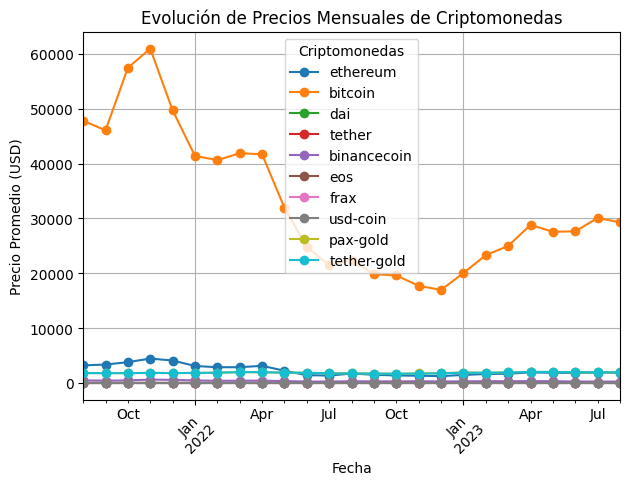

In [17]:
import matplotlib.pyplot as plt

# Crear un gráfico de líneas múltiples
plt.figure(figsize=(12, 6))  # Tamaño del gráfico
df_Combinado.plot(kind='line', marker='o')

plt.title('Evolución de Precios Mensuales de Criptomonedas')
plt.xlabel('Fecha')
plt.ylabel('Precio Promedio (USD)')
plt.grid(True)
plt.legend(title='Criptomonedas')
plt.tight_layout()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.show()


In [ ]:
#Buscar el precio semanal de las criptomonedas seleccionadas desde el 2022 hasta la actualidad

In [2]:
import requests
import json
import pandas as pd

def crear_dataframe(url, currency):
    response = requests.get(url)
    data = json.loads(response.text)

    # Crear DataFrame con los precios semanales
    df = pd.DataFrame(data['prices'], columns=['timestamp', currency])

    # Convertir el timestamp a datetime
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

    # Redondear a 2 decimales
    df.set_index('timestamp', inplace=True)

    # Agrupar los precios semanalmente y calcular el precio promedio de cada uno
    df_semanal = df.resample('W').mean()

    return df_semanal

# URLs of cryptocurrencies
cryptos = [
    ('ethereum', 'https://api.coingecko.com/api/v3/coins/ethereum/market_chart?vs_currency=usd&days=365'),
    ('bitcoin', 'https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?vs_currency=usd&days=365'),
    ('dai', 'https://api.coingecko.com/api/v3/coins/dai/market_chart?vs_currency=usd&days=365'),
    ('tether', 'https://api.coingecko.com/api/v3/coins/tether/market_chart?vs_currency=usd&days=365'),
    ('binancecoin', 'https://api.coingecko.com/api/v3/coins/binancecoin/market_chart?vs_currency=usd&days=365'),
    ('eos', 'https://api.coingecko.com/api/v3/coins/eos/market_chart?vs_currency=usd&days=365'),
    ('frax', 'https://api.coingecko.com/api/v3/coins/frax/market_chart?vs_currency=usd&days=365'),
    ('usd-coin', 'https://api.coingecko.com/api/v3/coins/usd-coin/market_chart?vs_currency=usd&days=365'),
    ('pax-gold', 'https://api.coingecko.com/api/v3/coins/pax-gold/market_chart?vs_currency=usd&days=365'),
    ('tether-gold', 'https://api.coingecko.com/api/v3/coins/tether-gold/market_chart?vs_currency=usd&days=365')
]

# Crear un DataFrame con todas las monedas combinadas
df_combinadoS = pd.DataFrame()

for currency, url in cryptos:
    df = crear_dataframe(url, currency)
    df_combinadoS = pd.concat([df_combinadoS, df], axis=1)

# Redondear a 2 decimales
df_combinadoS = df_combinadoS.round(2)

# Guardar el Df en un CSV
df_combinadoS.to_csv('Precios_Semanales.csv')


print(df_combinadoS)

            ethereum   bitcoin   dai  tether  binancecoin   eos  frax  \
timestamp                                                               
2022-08-21   1752.70  22803.54  1.00    1.00       297.11  1.41  1.00   
2022-08-28   1610.48  21131.53  1.00    1.00       294.16  1.69  1.00   
2022-09-04   1541.67  19958.14  1.00    1.00       279.60  1.46  1.00   
2022-09-11   1646.27  20042.23  1.00    1.00       281.32  1.59  1.00   
2022-09-18   1579.35  20588.37  1.00    1.00       281.33  1.51  1.00   
2022-09-25   1324.46  19159.04  1.00    1.00       271.11  1.25  1.00   
2022-10-02   1325.22  19277.92  1.00    1.00       279.18  1.18  1.00   
2022-10-09   1329.92  19716.76  1.00    1.00       286.49  1.16  1.00   
2022-10-16   1292.71  19208.19  1.00    1.00       271.74  1.05  1.00   
2022-10-23   1304.64  19245.91  1.00    1.00       271.79  1.05  1.00   
2022-10-30   1489.71  20204.50  1.00    1.00       287.63  1.11  1.00   
2022-11-06   1581.02  20630.76  1.00    1.00       

<Figure size 1200x600 with 0 Axes>

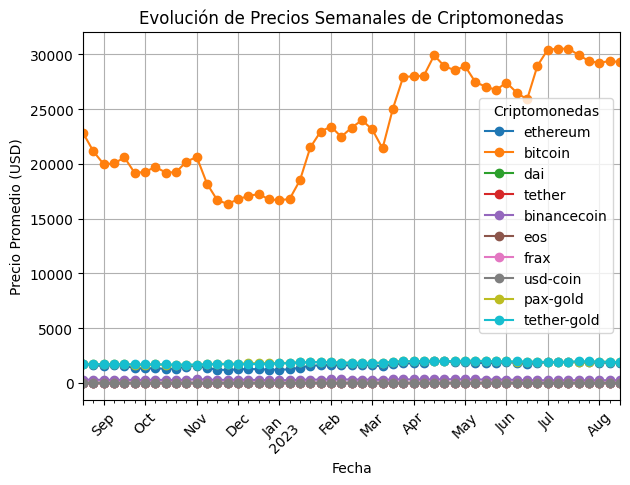

In [18]:
import matplotlib.pyplot as plt

# Crear un gráfico de líneas múltiples
plt.figure(figsize=(12, 6))  # Tamaño del gráfico
df_combinadoS.plot(kind='line', marker='o')

plt.title('Evolución de Precios Semanales de Criptomonedas')
plt.xlabel('Fecha')
plt.ylabel('Precio Promedio (USD)')
plt.grid(True)
plt.legend(title='Criptomonedas')
plt.tight_layout()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.show()

In [ ]:
#Obtener el Volumen actual de las criptomonedas seleccionadas

In [20]:
import pandas as pd
from pycoingecko import CoinGeckoAPI

# Crear una instancia de CoinGeckoAPI class
cg = CoinGeckoAPI()

# Obtener el volumen de las últimas 24 horas de las criptomonedas
data = cg.get_price(ids=['ethereum', 'bitcoin', 'dai', 'tether', 'binancecoin', 'eos', 'frax', 'usd-coin', 'pax-gold', 'tether-gold'], vs_currencies='usd', include_24hr_vol=True)

# Convertir el diccionario a un df de Pandas
df = pd.DataFrame.from_dict(data, orient='index')

# Guardar el Df en un CSV
df.to_csv('Volumen_Actual.csv')

# Show the dataframe
print(df)

                      usd   usd_24h_vol
binancecoin    234.510000  5.322564e+08
bitcoin      29157.000000  1.339770e+10
dai              1.001000  6.107608e+07
eos              0.671773  1.094238e+08
ethereum      1823.870000  4.799527e+09
frax             0.997691  8.450673e+06
pax-gold      1900.350000  7.925430e+06
tether           0.998678  1.212832e+10
tether-gold   1905.910000  2.350909e+06
usd-coin         1.000000  3.571971e+09


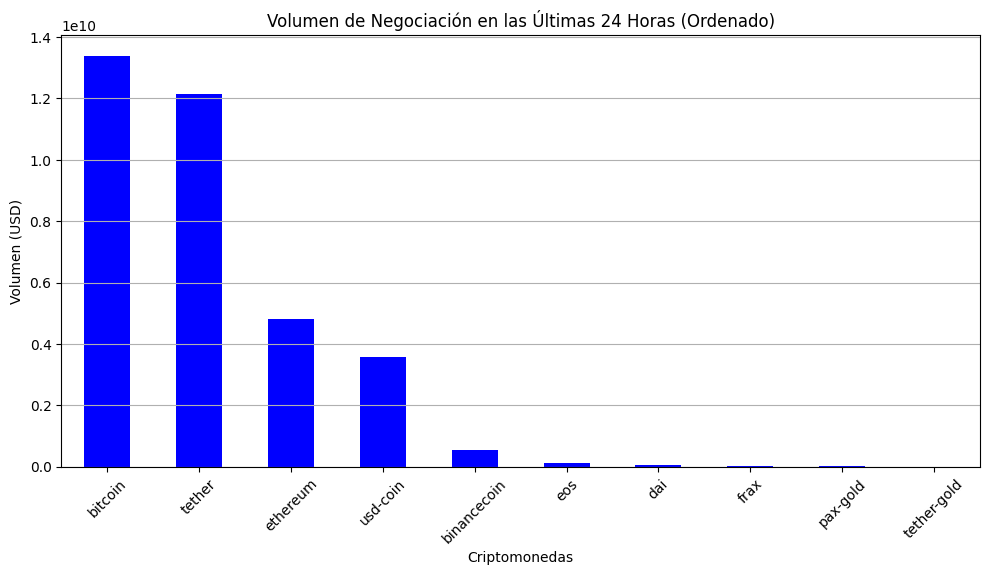

In [22]:
import matplotlib.pyplot as plt

# Ordenar el DataFrame por el volumen de negociación en orden descendente
df_sorted = df.sort_values(by='usd_24h_vol', ascending=False)

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
df_sorted['usd_24h_vol'].plot(kind='bar', color='blue')

plt.title('Volumen de Negociación en las Últimas 24 Horas (Ordenado)')
plt.xlabel('Criptomonedas')
plt.ylabel('Volumen (USD)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.show()

In [ ]:
#Obtener el volumen de las criptomenedas de todo el 2023

In [25]:
# Importar las bibliotecas necesarias
import pandas as pd
from pycoingecko import CoinGeckoAPI

# Crear una instancia de la clase CoinGeckoAPI
cg = CoinGeckoAPI()

# Definir el rango de fechas del año 2023
start_date = '01-01-2023'
end_date = '31-12-2023'

# Crear un diccionario vacío para almacenar los datos
data = {}

# Iterar sobre las criptomonedas deseadas
for coin in ['ethereum', 'bitcoin', 'dai', 'tether', 'binancecoin', 'eos', 'frax', 'usd-coin', 'pax-gold', 'tether-gold']:
    # Obtener el suministro circulante y el suministro total de la criptomoneda
    supply = cg.get_coin_by_id(id=coin, localization=False, tickers=False, market_data=True, community_data=False, developer_data=False, sparkline=False)
    # Extraer los datos del suministro y convertirlos en una serie de pandas
    supply = pd.Series(data=[supply['market_data']['circulating_supply'], supply['market_data']['total_supply']], index=['circulating_supply', 'total_supply'])
    # Renombrar la serie con el nombre de la criptomoneda
    supply.name = coin
    # Añadir la serie al diccionario
    data[coin] = supply

# Convertir el diccionario en un dataframe de pandas
Volumen2023 = pd.DataFrame.from_dict(data)

# Formatear los valores en notación decimal estándar
Volumen2023 = Volumen2023.applymap('{:,.4f}'.format)

# Guardar el Df en un CSV
df.to_csv('Volumen_2023.csv')

# Mostrar el dataframe
print(Volumen2023)

                            ethereum          bitcoin                 dai  \
circulating_supply  120,139,112.9695  19,458,962.0000  3,925,724,359.2583   
total_supply        120,139,112.9695  21,000,000.0000  3,925,323,800.7388   

                                 tether       binancecoin                 eos  \
circulating_supply  83,182,001,730.3693  153,856,150.0000  1,116,792,540.2936   
total_supply        83,182,001,730.3693  153,856,150.0000                 nan   

                                frax             usd-coin      pax-gold  \
circulating_supply  812,641,409.4088  26,030,997,779.0090  248,343.3610   
total_supply        812,641,409.4088  26,030,997,779.0090  248,343.3610   

                     tether-gold  
circulating_supply  246,524.3300  
total_supply        246,524.3300  


<Figure size 1000x3000 with 0 Axes>

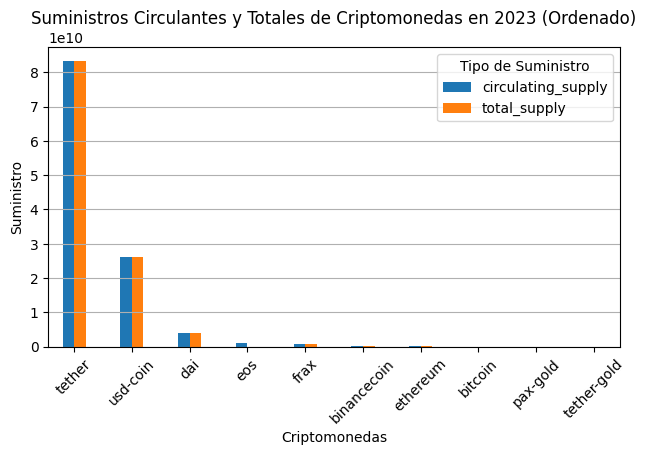

In [30]:
import matplotlib.pyplot as plt

# Transponer el DataFrame para que las criptomonedas estén en el eje x
Volumen2023_T = Volumen2023.transpose()

# Eliminar las comas de los valores y convertirlos a números flotantes
Volumen2023_T = Volumen2023_T.apply(lambda x: x.str.replace(',', '').astype(float))

# Ordenar el DataFrame por el suministro circulante en orden descendente
Volumen2023_T_sorted = Volumen2023_T.sort_values(by='circulating_supply', ascending=False)

# Crear un gráfico de barras agrupadas
plt.figure(figsize=(10, 30))  # Tamaño del gráfico
Volumen2023_T_sorted.plot(kind='bar', width=0.4)

plt.title('Suministros Circulantes y Totales de Criptomonedas en 2023 (Ordenado)')
plt.xlabel('Criptomonedas')
plt.ylabel('Suministro')
plt.grid(True, axis='y')
plt.tight_layout()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.legend(title='Tipo de Suministro')
plt.show()

In [ ]:
##Obtener el volumen de las criptomenedas de todo el 2022

In [6]:
import pandas as pd
from pycoingecko import CoinGeckoAPI

# Crear una instancia de la clase CoinGeckoAPI
cg = CoinGeckoAPI()

# Definir el rango de fechas del año 2022
start_date = '01-01-2022'
end_date = '31-12-2022'

# Crear un diccionario vacío para almacenar los datos
data = {}

# Lista de criptomonedas deseadas
cryptos = ['ethereum', 'bitcoin', 'dai', 'tether', 'binancecoin', 'eos', 'frax', 'usd-coin', 'pax-gold', 'tether-gold']

# Iterar sobre las criptomonedas deseadas
for coin in cryptos:
    # Obtener el suministro circulante y el suministro total de la criptomoneda
    supply = cg.get_coin_by_id(id=coin, localization=False, tickers=False, market_data=True, community_data=False, developer_data=False, sparkline=False)
    # Extraer los datos del suministro y convertirlos en una serie de pandas
    supply = pd.Series(data=[supply['market_data']['circulating_supply'], supply['market_data']['total_supply']], index=['circulating_supply', 'total_supply'])
    # Renombrar la serie con el nombre de la criptomoneda
    supply.name = coin
    # Añadir la serie al diccionario
    data[coin] = supply

# Convertir el diccionario en un dataframe de pandas
supply_data = pd.DataFrame.from_dict(data)

# Formatear los valores en notación decimal estándar
supply_data = supply_data.applymap('{:,.4f}'.format)

# Guardar el Df en un CSV
df.to_csv('Volumen_2022.csv')

# Mostrar el dataframe
print(supply_data)

                            ethereum          bitcoin                 dai  \
circulating_supply  120,139,112.9695  19,458,937.0000  3,926,438,816.7588   
total_supply        120,139,112.9695  21,000,000.0000  3,925,724,359.2583   

                                 tether       binancecoin                 eos  \
circulating_supply  83,182,001,730.3693  153,856,150.0000  1,116,787,761.7207   
total_supply        83,182,001,730.3693  153,856,150.0000                 nan   

                                frax             usd-coin      pax-gold  \
circulating_supply  812,641,409.4088  26,030,997,809.3890  248,343.3610   
total_supply        812,641,409.4088  26,031,002,905.0090  248,343.3610   

                     tether-gold  
circulating_supply  246,524.3300  
total_supply        246,524.3300  


<Figure size 1000x600 with 0 Axes>

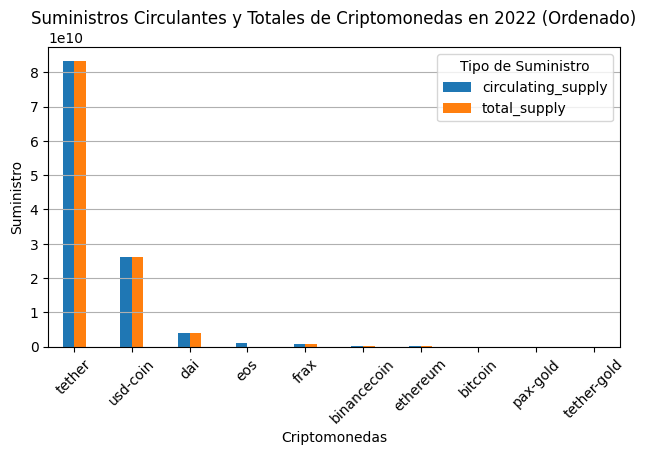

In [31]:
import matplotlib.pyplot as plt

# Transponer el DataFrame para que las criptomonedas estén en el eje x
supply_data_T = supply_data.transpose()

# Convertir los valores a números flotantes (eliminar comas y convertir)
supply_data_T = supply_data_T.apply(lambda x: x.str.replace(',', '').astype(float))

# Ordenar el DataFrame por el suministro circulante en orden descendente
supply_data_T_sorted = supply_data_T.sort_values(by='circulating_supply', ascending=False)

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
supply_data_T_sorted.plot(kind='bar', width=0.4)

plt.title('Suministros Circulantes y Totales de Criptomonedas en 2022 (Ordenado)')
plt.xlabel('Criptomonedas')
plt.ylabel('Suministro')
plt.grid(True, axis='y')
plt.tight_layout()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.legend(title='Tipo de Suministro')
plt.show()

In [ ]:
# Obtener la capitalización del mercado de las criptomonedas en dólares estadounidenses

In [33]:
import pandas as pd
from pycoingecko import CoinGeckoAPI

# Crear una instancia de la clase CoinGeckoAPI
cg = CoinGeckoAPI()

# Lista de criptomonedas deseadas
cryptos = ['ethereum', 'bitcoin', 'dai', 'tether', 'binancecoin', 'eos', 'frax', 'usd-coin', 'pax-gold', 'tether-gold']

# Obtener la capitalización del mercado de las criptomonedas en dólares estadounidenses
data = cg.get_price(ids=cryptos, vs_currencies='usd', include_market_cap=True)

# Convertir el diccionario en un dataframe de pandas
df = pd.DataFrame.from_dict(data, orient='index')

# Guardar el Df en un CSV
df.to_csv('capitalización_mercado.csv')

# Mostrar el dataframe
print(df)

                      usd  usd_market_cap
binancecoin    234.640000    3.609333e+10
bitcoin      29167.000000    5.675414e+11
dai              1.001000    3.926598e+09
eos              0.672075    7.505266e+08
ethereum      1825.100000    2.192424e+11
frax             0.998176    8.111459e+08
pax-gold      1900.950000    4.719830e+08
tether           0.999014    8.307416e+10
tether-gold   1906.570000    4.699506e+08
usd-coin         1.000000    2.603325e+10


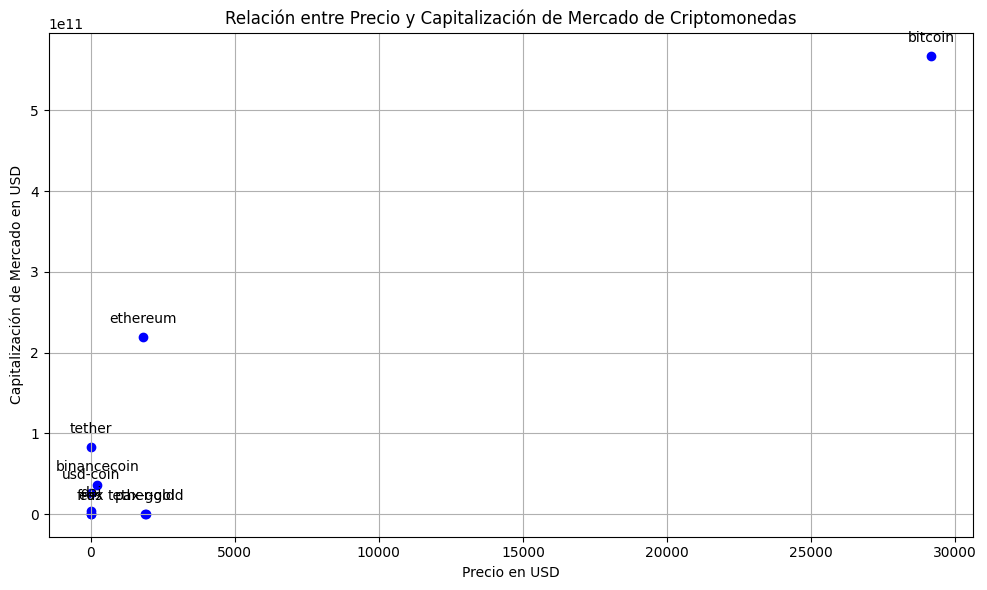

In [38]:
import matplotlib.pyplot as plt

# Datos de las criptomonedas
data = {
    'binancecoin': {'usd': 234.640000, 'usd_market_cap': 3.609333e+10},
    'bitcoin': {'usd': 29167.000000, 'usd_market_cap': 5.675414e+11},
    'dai': {'usd': 1.001000, 'usd_market_cap': 3.926598e+09},
    'eos': {'usd': 0.672075, 'usd_market_cap': 7.505266e+08},
    'ethereum': {'usd': 1825.100000, 'usd_market_cap': 2.192424e+11},
    'frax': {'usd': 0.998176, 'usd_market_cap': 8.111459e+08},
    'pax-gold': {'usd': 1900.950000, 'usd_market_cap': 4.719830e+08},
    'tether': {'usd': 0.999014, 'usd_market_cap': 8.307416e+10},
    'tether-gold': {'usd': 1906.570000, 'usd_market_cap': 4.699506e+08},
    'usd-coin': {'usd': 1.000000, 'usd_market_cap': 2.603325e+10}
}

# Crear listas separadas para los valores de precio y capitalización de mercado
prices = [data[coin]['usd'] for coin in data]
market_caps = [data[coin]['usd_market_cap'] for coin in data]

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
plt.scatter(prices, market_caps, marker='o', color='blue')

plt.title('Relación entre Precio y Capitalización de Mercado de Criptomonedas')
plt.xlabel('Precio en USD')
plt.ylabel('Capitalización de Mercado en USD')
plt.grid(True)
plt.tight_layout()

# Etiquetar cada punto con el nombre de la criptomoneda
for i, coin in enumerate(data):
    plt.annotate(coin, (prices[i], market_caps[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

In [ ]:
# Obtener el ranking actual y otros datos relevantes de las criptomonedas seleccionadas

In [13]:
import requests

# Lista de criptomonedas a buscar
cryptos = ['ethereum', 'bitcoin', 'dai', 'tether', 'binancecoin', 'eos', 'frax', 'usd-coin', 'pax-gold', 'tether-gold']

# URL base de la API de CoinGecko
base_url = "https://api.coingecko.com/api/v3"

# Obtener los datos de cada criptomoneda
for crypto in cryptos:
    url = f"{base_url}/coins/{crypto}"
    response = requests.get(url)
    data = response.json()

    # Imprimir el ranking y otros datos relevantes
    print(f"Ranking de {crypto.capitalize()}: {data['market_cap_rank']}")
    print(f"Precio actual: {data['market_data']['current_price']['usd']} USD")
    print(f"Capitalización de mercado: {data['market_data']['market_cap']['usd']} USD")
    print(f"Volumen de operaciones en 24 horas: {data['market_data']['total_volume']['usd']} USD")
    print()
# Guardar el Df en un CSV
df.to_csv('Datos_Actuales.csv')

Ranking de Ethereum: 2
Precio actual: 1822.31 USD
Capitalización de mercado: 218966500845 USD
Volumen de operaciones en 24 horas: 6340061071 USD

Ranking de Bitcoin: 1
Precio actual: 29131 USD
Capitalización de mercado: 566871871446 USD
Volumen de operaciones en 24 horas: 9229118434 USD

Ranking de Dai: 21
Precio actual: 1.0 USD
Capitalización de mercado: 3925480942 USD
Volumen de operaciones en 24 horas: 61377295 USD

Ranking de Tether: 3
Precio actual: 0.99861 USD
Capitalización de mercado: 83081518726 USD
Volumen de operaciones en 24 horas: 21662121105 USD

Ranking de Binancecoin: 4
Precio actual: 233.93 USD
Capitalización de mercado: 35969277089 USD
Volumen de operaciones en 24 horas: 534587232 USD

Ranking de Eos: 52
Precio actual: 0.669937 USD
Capitalización de mercado: 748573081 USD
Volumen de operaciones en 24 horas: 114681598 USD

Ranking de Frax: 50
Precio actual: 0.997714 USD
Capitalización de mercado: 810880167 USD
Volumen de operaciones en 24 horas: 8137899 USD

Ranking de

In [ ]:
# Obtener el ranking del último mes y otros datos relevantes de las criptomonedas seleccionadas

In [14]:
import pandas as pd
import requests

# Lista de criptomonedas a buscar
cryptos = ['ethereum', 'bitcoin', 'dai', 'tether', 'binancecoin', 'eos', 'frax', 'usd-coin', 'pax-gold', 'tether-gold']

# URL base de la API de CoinGecko
base_url = "https://api.coingecko.com/api/v3"

# Obtener los datos de cada criptomoneda
crypto_data = []
for crypto in cryptos:
    url = f"{base_url}/coins/{crypto}/market_chart"
    params = {
        "vs_currency": "usd",
        "days": 30
    }
    response = requests.get(url, params=params)
    data = response.json()

    # Obtener el precio promedio del último mes
    prices = [x[1] for x in data['prices']]
    avg_price = sum(prices) / len(prices)

    # Agregar los datos a la lista
    crypto_data.append({
        "Cryptocurrency": crypto.capitalize(),
        "Ranking": "",
        "Precio actual (USD)": "",
        "Capitalización de mercado (USD)": "",
        "Volumen de operaciones en 24 horas (USD)": "",
        "Precio promedio último mes (USD)": avg_price,
    })

# Crear el DataFrame
df = pd.DataFrame(crypto_data)

# Guardar el DataFrame como un archivo CSV
df.to_csv("criptomonedas_ultimo_mes.csv", index=False)

In [ ]:
#Combinar en un dataframe

In [15]:
import pandas as pd
import requests
from pycoingecko import CoinGeckoAPI

# Funciones para obtener y procesar los datos
def get_avg_price(crypto):
    cg = CoinGeckoAPI()
    data = cg.get_coin_market_chart_range_by_id(id=crypto, vs_currency='usd', from_timestamp=start_date, to_timestamp=end_date)
    prices = [entry[1] for entry in data['prices']]
    avg_price = sum(prices) / len(prices)
    return avg_price

def get_crypto_info(crypto):
    cg = CoinGeckoAPI()
    data = cg.get_coin_by_id(id=crypto)
    return {
        "Cryptocurrency": crypto.capitalize(),
        "Ranking": data['market_cap_rank'],
        "Precio actual (USD)": data['market_data']['current_price']['usd'],
        "Capitalización de mercado (USD)": data['market_data']['market_cap']['usd'],
        "Volumen de operaciones en 24 horas (USD)": data['market_data']['total_volume']['usd']
    }

# Lista de criptomonedas
cryptos = ['ethereum', 'bitcoin', 'dai', 'tether', 'binancecoin', 'eos', 'frax', 'usd-coin', 'pax-gold', 'tether-gold']

# Rango de fechas
start_date = int(pd.Timestamp('2023-01-01').timestamp())
end_date = int(pd.Timestamp('2023-12-31').timestamp())

# Crear DataFrames
avg_prices_data = []
info_data = []

for crypto in cryptos:
    avg_price = get_avg_price(crypto)
    avg_prices_data.append({"Cryptocurrency": crypto.capitalize(), "Precio promedio último año (USD)": avg_price})
    info_data.append(get_crypto_info(crypto))

# Crear DataFrames a partir de los datos
df_avg_prices = pd.DataFrame(avg_prices_data)
df_info = pd.DataFrame(info_data)

# Combina los DataFrames en uno solo usando 'Cryptocurrency' como clave
final_df = pd.merge(df_avg_prices, df_info, on="Cryptocurrency")

# Guarda el DataFrame como un archivo CSV
final_df.to_csv("Datos_combinados.csv", index=False)

# Muestra el DataFrame final
print(final_df)

  Cryptocurrency  Precio promedio último año (USD)  Ranking  \
0       Ethereum                       1753.746885        2   
1        Bitcoin                      26314.784881        1   
2            Dai                          0.999939       21   
3         Tether                          1.000691        3   
4    Binancecoin                        288.312526        4   
5            Eos                          0.955318       52   
6           Frax                          0.999537       50   
7       Usd-coin                          1.000179        6   
8       Pax-gold                       1928.036093       88   
9    Tether-gold                       1931.891988       90   

   Precio actual (USD)  Capitalización de mercado (USD)  \
0          1822.960000                     218966500845   
1         29155.000000                     566871871446   
2             0.999781                       3925480942   
3             0.998579                      83081518726   
4          

In [ ]:
#Busco la capitalización del mercado de las criptomonedas seleccionadas

In [1]:
import requests

def obtener_capitalizacion_mercado():
    url = 'https://api.coingecko.com/api/v3/global'
    response = requests.get(url)
    data = response.json()
    market_cap = data['data']['market_cap_percentage']['btc']
    return market_cap

capitalizacion = obtener_capitalizacion_mercado()

print(f"La capitalización del mercado del Bitcoin es de {capitalizacion:.2f}%.")

La capitalización del mercado del Bitcoin es de 46.51%.


In [2]:
import requests

def obtener_capitalizacion_mercado():
    url = 'https://api.coingecko.com/api/v3/global'
    response = requests.get(url)
    data = response.json()
    market_cap = data['data']['market_cap_percentage']['eth']
    return market_cap

capitalizacion = obtener_capitalizacion_mercado()

print(f"La capitalización del mercado de Ethereum es de {capitalizacion:.2f}%.")

La capitalización del mercado de Ethereum es de 18.30%.


In [12]:
import requests

def obtener_capitalizacion_mercado(moneda):
    url = 'https://api.coingecko.com/api/v3/global'
    response = requests.get(url)
    data = response.json()
    market_cap = data['data']['market_cap_percentage'][moneda]
    return market_cap

moneda = 'usdc'
capitalizacion = obtener_capitalizacion_mercado(moneda)

print(f"La capitalización del mercado de {moneda.upper()} es de {capitalizacion:.2f}%.")

La capitalización del mercado de USDC es de 2.39%.


In [20]:
import requests

def obtener_capitalizacion_mercado(moneda):
    url = 'https://api.coingecko.com/api/v3/global'
    response = requests.get(url)
    data = response.json()
    market_cap = data['data']['market_cap_percentage'][moneda]
    return market_cap

moneda = 'usdt'
capitalizacion = obtener_capitalizacion_mercado(moneda)

print(f"La capitalización del mercado de {moneda.upper()} es de {capitalizacion:.2f}%.")

La capitalización del mercado de USDT es de 7.57%.


In [21]:
import requests

def obtener_capitalizacion_mercado(moneda):
    url = 'https://api.coingecko.com/api/v3/global'
    response = requests.get(url)
    data = response.json()
    market_cap = data['data']['market_cap_percentage'][moneda]
    return market_cap

moneda = 'bnb'
capitalizacion = obtener_capitalizacion_mercado(moneda)

print(f"La capitalización del mercado de {moneda.upper()} es de {capitalizacion:.2f}%.")

La capitalización del mercado de BNB es de 3.05%.


In [ ]:
#Uno los resultados en un Dataframe de Pandas

In [26]:
import requests
import pandas as pd

def obtener_capitalizacion_mercado(moneda):
    url = 'https://api.coingecko.com/api/v3/global'
    response = requests.get(url)
    data = response.json()
    market_cap = data['data']['market_cap_percentage'][moneda]
    return market_cap

# Obtener capitalización de mercado para diferentes monedas
monedas = ['bnb', 'usdt', 'usdc', 'eth', 'btc']
capitalizaciones = [obtener_capitalizacion_mercado(moneda) for moneda in monedas]
nombres_monedas = ['Binance Coin', 'Tether', 'USD Coin', 'Ethereum', 'Bitcoin']

# Crear un DataFrame
data = {'Moneda': nombres_monedas, 'Capitalización de Mercado (%)': capitalizaciones}
CapMercado = pd.DataFrame(data)

# Guardar el DataFrame en un archivo CSV
CapMercado.to_csv('capitalizaciones_mercado.csv', index=False)

# Imprimir el DataFrame
print(CapMercado)

         Moneda  Capitalización de Mercado (%)
0  Binance Coin                       3.055588
1        Tether                       7.571300
2      USD Coin                       2.395689
3      Ethereum                      18.261819
4       Bitcoin                      46.371036


         Moneda  Capitalización de Mercado (%)
4       Bitcoin                      46.353382
3      Ethereum                      18.269473
1        Tether                       7.591776
0  Binance Coin                       3.058824
2      USD Coin                       2.396647


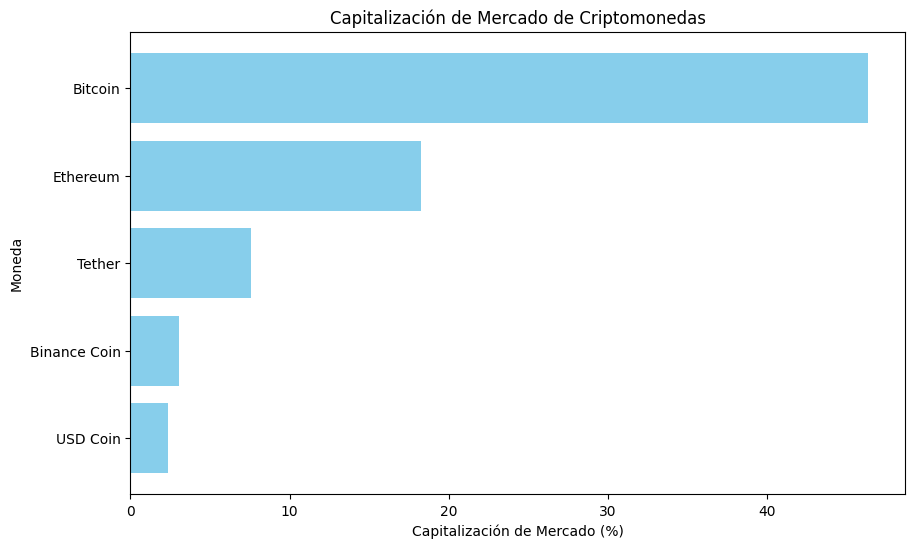

In [27]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

def obtener_capitalizacion_mercado(moneda):
    url = 'https://api.coingecko.com/api/v3/global'
    response = requests.get(url)
    data = response.json()
    market_cap = data['data']['market_cap_percentage'][moneda]
    return market_cap

# Obtener capitalización de mercado para diferentes monedas
monedas = ['bnb', 'usdt', 'usdc', 'eth', 'btc']
capitalizaciones = [obtener_capitalizacion_mercado(moneda) for moneda in monedas]
nombres_monedas = ['Binance Coin', 'Tether', 'USD Coin', 'Ethereum', 'Bitcoin']

# Crear un DataFrame
data = {'Moneda': nombres_monedas, 'Capitalización de Mercado (%)': capitalizaciones}
CapMercado = pd.DataFrame(data)

# Ordenar el DataFrame de mayor a menor
CapMercado = CapMercado.sort_values(by='Capitalización de Mercado (%)', ascending=False)

# Guardar el DataFrame en un archivo CSV
CapMercado.to_csv('capitalizaciones_mercado.csv', index=False)

# Imprimir el DataFrame
print(CapMercado)

# Crear un gráfico de barras horizontales
plt.figure(figsize=(10, 6))
plt.barh(CapMercado['Moneda'], CapMercado['Capitalización de Mercado (%)'], color='skyblue')
plt.xlabel('Capitalización de Mercado (%)')
plt.ylabel('Moneda')
plt.title('Capitalización de Mercado de Criptomonedas')
plt.gca().invert_yaxis()  # Invertir el eje y para ordenar de mayor a menor
plt.show()

         Moneda  Capitalización de Mercado (%)
4       Bitcoin                      46.353382
3      Ethereum                      18.269473
1        Tether                       7.591776
0  Binance Coin                       3.058824
2      USD Coin                       2.396647


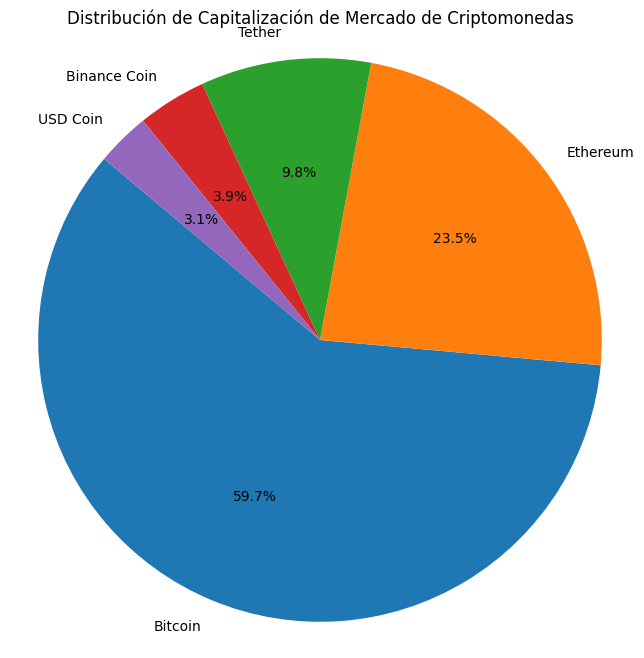

In [28]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

def obtener_capitalizacion_mercado(moneda):
    url = 'https://api.coingecko.com/api/v3/global'
    response = requests.get(url)
    data = response.json()
    market_cap = data['data']['market_cap_percentage'][moneda]
    return market_cap

# Obtener capitalización de mercado para diferentes monedas
monedas = ['bnb', 'usdt', 'usdc', 'eth', 'btc']
capitalizaciones = [obtener_capitalizacion_mercado(moneda) for moneda in monedas]
nombres_monedas = ['Binance Coin', 'Tether', 'USD Coin', 'Ethereum', 'Bitcoin']

# Crear un DataFrame
data = {'Moneda': nombres_monedas, 'Capitalización de Mercado (%)': capitalizaciones}
CapMercado = pd.DataFrame(data)

# Ordenar el DataFrame de mayor a menor
CapMercado = CapMercado.sort_values(by='Capitalización de Mercado (%)', ascending=False)

# Guardar el DataFrame en un archivo CSV
CapMercado.to_csv('capitalizaciones_mercado.csv', index=False)

# Imprimir el DataFrame
print(CapMercado)

# Crear un gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(CapMercado['Capitalización de Mercado (%)'], labels=CapMercado['Moneda'], autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Capitalización de Mercado de Criptomonedas')
plt.axis('equal')  # Hace que el gráfico de torta sea circular
plt.show()

In [30]:
import requests
import pandas as pd

def obtener_market_data(moneda):
    url = f'https://api.coingecko.com/api/v3/coins/{moneda}'
    response = requests.get(url)
    data = response.json()
    return data

monedas = ['ethereum', 'bitcoin', 'dai', 'tether', 'binancecoin', 'eos', 'frax', 'usd-coin', 'pax-gold', 'tether-gold']

datos_monedas = []

for moneda in monedas:
    market_data = obtener_market_data(moneda)
    nombre = market_data['name']
    simbolo = market_data['symbol']
    precio = market_data['market_data']['current_price']['usd']
    capitalizacion = market_data['market_data']['market_cap']['usd']
    
    datos_monedas.append({
        'Moneda': nombre,
        'Símbolo': simbolo,
        'Precio (USD)': precio,
        'Capitalización de Mercado (USD)': capitalizacion
    })

df = pd.DataFrame(datos_monedas)

# Guardar el DataFrame en un archivo CSV
df.to_csv('market_data_criptomonedas.csv', index=False)

# Imprimir el DataFrame
print(df)

        Moneda Símbolo  Precio (USD)  Capitalización de Mercado (USD)
0     Ethereum     eth   1665.600000                     199730515994
1      Bitcoin     btc  26081.000000                     507332773845
2          Dai     dai      0.999195                       3944878692
3       Tether    usdt      0.998974                      82757304175
4          BNB     bnb    217.410000                      33444935801
5          EOS     eos      0.572941                        639791092
6         Frax    frax      0.995795                        804259259
7     USD Coin    usdc      0.999283                      26180785302
8     PAX Gold    paxg   1884.350000                        468907284
9  Tether Gold    xaut   1891.230000                        466385480


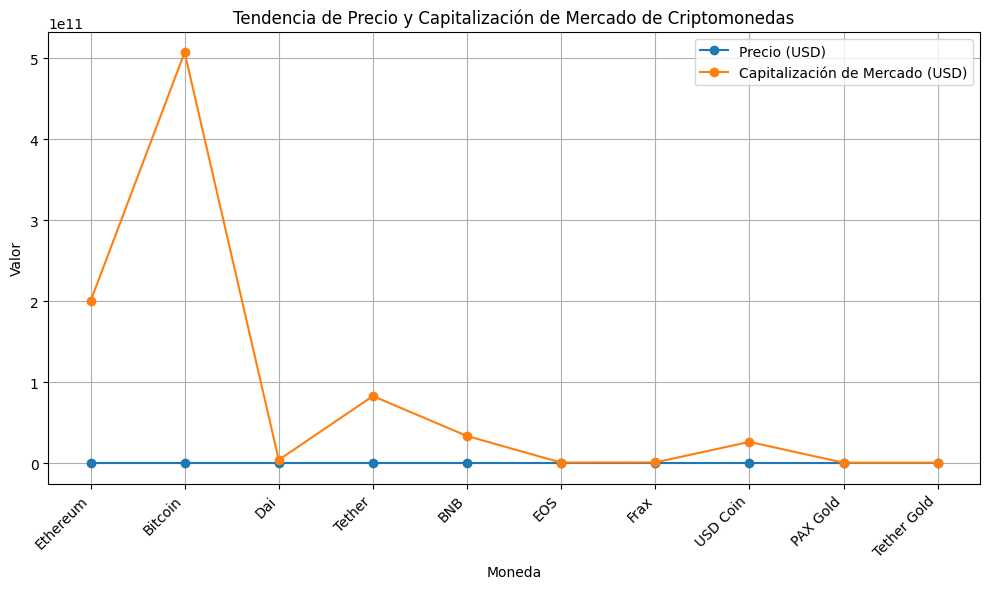

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Tu DataFrame
data = [
    ('Ethereum', 'eth', 1665.6, 199730515994),
    ('Bitcoin', 'btc', 26081.0, 507332773845),
    ('Dai', 'dai', 0.999195, 3944878692),
    ('Tether', 'usdt', 0.998974, 82757304175),
    ('BNB', 'bnb', 217.41, 33444935801),
    ('EOS', 'eos', 0.572941, 639791092),
    ('Frax', 'frax', 0.995795, 804259259),
    ('USD Coin', 'usdc', 0.999283, 26180785302),
    ('PAX Gold', 'paxg', 1884.35, 468907284),
    ('Tether Gold', 'xaut', 1891.23, 466385480),
]

df = pd.DataFrame(data, columns=['Moneda', 'Símbolo', 'Precio (USD)', 'Capitalización de Mercado (USD)'])

# Crear un gráfico de líneas
plt.figure(figsize=(10, 6))

# Línea para el precio de cada moneda
plt.plot(df['Moneda'], df['Precio (USD)'], marker='o', label='Precio (USD)')

# Línea para la capitalización del mercado de cada moneda
plt.plot(df['Moneda'], df['Capitalización de Mercado (USD)'], marker='o', label='Capitalización de Mercado (USD)')

plt.xlabel('Moneda')
plt.ylabel('Valor')
plt.title('Tendencia de Precio y Capitalización de Mercado de Criptomonedas')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [42]:
import pandas as pd
from pycoingecko import CoinGeckoAPI
cg = CoinGeckoAPI()

# Lista de criptomonedas
monedas = ['ethereum', 'bitcoin', 'dai', 'tether', 'binancecoin', 'eos', 'frax', 'usd-coin', 'pax-gold', 'tether-gold']

# Mercado argentino
mercado = 'ripio'

# Lista vacía para guardar los resultados
resultados = []

# Obtener los datos de market data y circulating supply de cada criptomoneda
for moneda in monedas:
    datos = cg.get_coin_by_id(id=moneda)
    # Extraer la información relevante de la moneda
    info = {
        'Moneda': moneda,
        'Precio (USD)': datos['market_data']['current_price']['usd'],
        'Volumen en 24 horas (USD)': datos['market_data']['total_volume']['usd'],
        'Capitalización de mercado (USD)': datos['market_data']['market_cap']['usd'],
        'Suministro circulante': datos['market_data']['circulating_supply'],
        'Suministro total': datos['market_data']['total_supply']
    }
    # Agregar la información a la lista de resultados
    resultados.append(info)
    
    # Convertir la lista de resultados en un dataframe de pandas
df = pd.DataFrame(resultados)

# Guardar el dataframe en un archivo csv
df.to_csv('DatosAR.csv', index=False)

# Imprimir el dataframe
print(df)

# O mostrar las primeras filas
print(df.head())


        Moneda  Precio (USD)  Volumen en 24 horas (USD)  \
0     ethereum   1661.270000                24228393402   
1      bitcoin  25961.000000                32242430411   
2          dai      0.999766                  267540893   
3       tether      0.999305                28041117614   
4  binancecoin    216.850000                  991868540   
5          eos      0.570298                  168693031   
6         frax      0.995901                   23956203   
7     usd-coin      0.998156                11873544114   
8     pax-gold   1882.700000                   16257485   
9  tether-gold   1889.300000                   12322760   

   Capitalización de mercado (USD)  Suministro circulante  Suministro total  
0                     199786098421           1.200539e+08      1.200539e+08  
1                     506513656860           1.946112e+07      2.100000e+07  
2                       3937826821           3.939457e+09      3.932519e+09  
3                      82663132665    

<Figure size 1000x600 with 0 Axes>

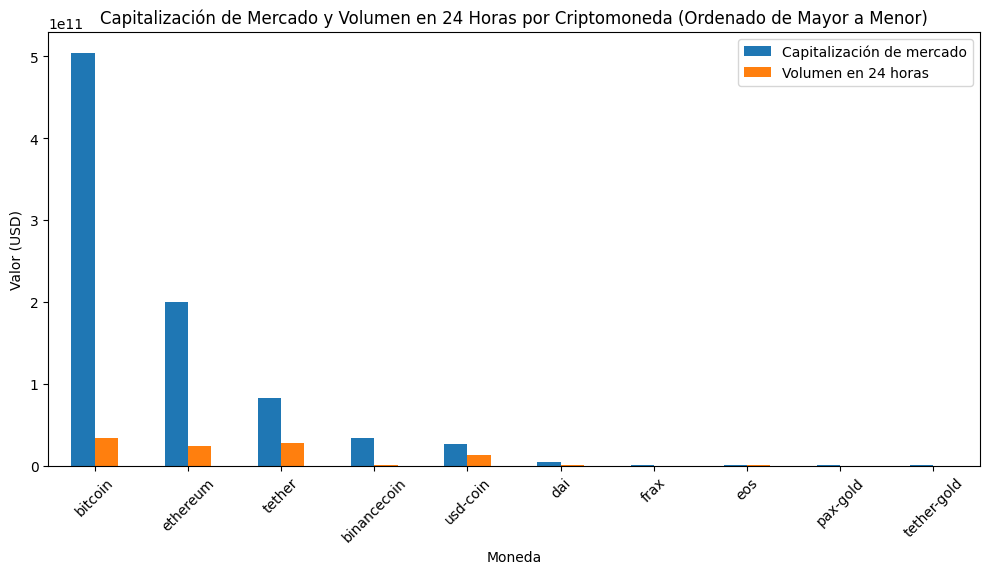

In [44]:
import pandas as pd
from pycoingecko import CoinGeckoAPI
import matplotlib.pyplot as plt

# Inicializar CoinGeckoAPI
cg = CoinGeckoAPI()

# Lista de criptomonedas
monedas = ['ethereum', 'bitcoin', 'dai', 'tether', 'binancecoin', 'eos', 'frax', 'usd-coin', 'pax-gold', 'tether-gold']

# Lista vacía para guardar los resultados
resultados = []

# Obtener los datos de market data y circulating supply de cada criptomoneda
for moneda in monedas:
    datos = cg.get_coin_by_id(id=moneda)
    # Extraer la información relevante de la moneda
    info = {
        'Moneda': moneda,
        'Capitalización de mercado (USD)': datos['market_data']['market_cap']['usd'],
        'Volumen en 24 horas (USD)': datos['market_data']['total_volume']['usd']
    }
    # Agregar la información a la lista de resultados
    resultados.append(info)

# Convertir la lista de resultados en un dataframe de pandas
df = pd.DataFrame(resultados)

# Ordenar el DataFrame por Capitalización de Mercado de mayor a menor
df = df.sort_values(by='Capitalización de mercado (USD)', ascending=False)

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))

# Filtrar las columnas relevantes para el gráfico
data_plot = df[['Moneda', 'Capitalización de mercado (USD)', 'Volumen en 24 horas (USD)']]

# Plotear el gráfico de barras
data_plot.plot(kind='bar', x='Moneda', figsize=(10, 6))
plt.title('Capitalización de Mercado y Volumen en 24 Horas por Criptomoneda (Ordenado de Mayor a Menor)')
plt.xlabel('Moneda')
plt.ylabel('Valor (USD)')
plt.xticks(rotation=45)
plt.legend(["Capitalización de mercado", "Volumen en 24 horas"])
plt.tight_layout()

# Mostrar el gráfico
plt.show()